# Initial Prompt

```
given this VAE model, how would i generate new images of the numbers 0 through 9:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784  # 28x28 MNIST images
hidden_size = 256
latent_size = 20  # Dimension of latent space
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data',
                                   train=True,
                                   transform=transforms.ToTensor(),
                                   download=True)

train_loader = DataLoader(dataset=train_dataset,
                                     batch_size=batch_size,
                                     shuffle=True)

# VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc21 = nn.Linear(hidden_size, latent_size)
        self.fc22 = nn.Linear(hidden_size, latent_size)
        self.fc3 = nn.Linear(latent_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, input_size)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Model instance, optimizer, and loss function
model = VAE(input_size, hidden_size, latent_size).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Reconstruction + KL divergence losses
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        images = images.to(device)

        # Forward pass
        recon_x, mu, logvar = model(images)
        loss = loss_function(recon_x, images, mu, logvar)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))
```                  

given this VAE model, how would i generate new images of the numbers 0 through 9:

In [ ]:
latent_size = 20  # Dimension of latent space

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784  # 28x28 MNIST images
hidden_size = 256

num_epochs = 10
batch_size = 100
learning_rate = 0.001

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data',
                                   train=True,
                                   transform=transforms.ToTensor(),
                                   download=True)

train_loader = DataLoader(dataset=train_dataset,
                                     batch_size=batch_size,
                                     shuffle=True)

# VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc21 = nn.Linear(hidden_size, latent_size)
        self.fc22 = nn.Linear(hidden_size, latent_size)
        self.fc3 = nn.Linear(latent_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, input_size)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Model instance, optimizer, and loss function
model = VAE(input_size, hidden_size, latent_size).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Reconstruction + KL divergence losses
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        images = images.to(device)

        # Forward pass
        recon_x, mu, logvar = model(images)
        loss = loss_function(recon_x, images, mu, logvar)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

Epoch [1/10], Step [100/600], Loss: 20494.6797
Epoch [1/10], Step [200/600], Loss: 18881.1562
Epoch [1/10], Step [300/600], Loss: 18733.5098
Epoch [1/10], Step [400/600], Loss: 17026.2246
Epoch [1/10], Step [500/600], Loss: 17331.8613
Epoch [1/10], Step [600/600], Loss: 17535.7402
Epoch [2/10], Step [100/600], Loss: 16877.8379
Epoch [2/10], Step [200/600], Loss: 16597.6621
Epoch [2/10], Step [300/600], Loss: 16224.9717
Epoch [2/10], Step [400/600], Loss: 16808.7930
Epoch [2/10], Step [500/600], Loss: 16356.9307
Epoch [2/10], Step [600/600], Loss: 16551.9375
Epoch [3/10], Step [100/600], Loss: 17172.4199
Epoch [3/10], Step [200/600], Loss: 17057.0918
Epoch [3/10], Step [300/600], Loss: 16294.2734
Epoch [3/10], Step [400/600], Loss: 16548.8633
Epoch [3/10], Step [500/600], Loss: 16187.4287
Epoch [3/10], Step [600/600], Loss: 16181.0879
Epoch [4/10], Step [100/600], Loss: 16287.3242
Epoch [4/10], Step [200/600], Loss: 16162.5312
Epoch [4/10], Step [300/600], Loss: 15825.1729
Epoch [4/10],

# Chatgpt section


# Entire Response 1 (markdown copy)

To generate new images of digits `0` through `9` using the VAE model you've provided, you need to **conditionally sample** from the latent space such that each sample corresponds to a specific digit class. However, the current VAE is **not conditioned on labels**, so it doesn't learn a latent space explicitly associated with each digit class.

### Option 1: Use a Pretrained Classifier to Filter Outputs
Since your VAE is **unconditional**, you can:

1. Sample random latent vectors from a standard normal distribution.
2. Decode them into images using the `decode` function.
3. Pass the decoded images through a **pretrained MNIST classifier** to get the predicted digit.
4. Keep only the samples that correspond to the digit you want.

Here’s how you can do it:

```python
import matplotlib.pyplot as plt

# Generate images for each digit from 0 to 9
def generate_digits(model, classifier, num_per_digit=5):
    model.eval()
    classifier.eval()
    digit_images = {i: [] for i in range(10)}

    while any(len(imgs) < num_per_digit for imgs in digit_images.values()):
        with torch.no_grad():
            z = torch.randn(100, latent_size).to(device)  # sample latent vectors
            samples = model.decode(z).cpu()
            samples = samples.view(-1, 1, 28, 28)

            outputs = classifier(samples)
            preds = outputs.argmax(dim=1)

            for img, pred in zip(samples, preds):
                if len(digit_images[pred.item()]) < num_per_digit:
                    digit_images[pred.item()].append(img.squeeze())

    # Display the generated digits
    fig, axes = plt.subplots(10, num_per_digit, figsize=(num_per_digit, 10))
    for digit in range(10):
        for i in range(num_per_digit):
            axes[digit, i].imshow(digit_images[digit][i], cmap='gray')
            axes[digit, i].axis('off')
    plt.tight_layout()
    plt.show()
```

You’ll need to load or train a classifier (`classifier`) on MNIST for this to work.

---

### Option 2: Train a **Conditional VAE (cVAE)**
To **directly generate** digits 0–9 without needing a classifier, you can modify your model to be conditional by incorporating digit labels into the encoder and decoder.

Let me know if you'd like help implementing a **conditional VAE**, which is better suited for generating specific digits.

# Response 1 python code

In [3]:
import matplotlib.pyplot as plt

# Generate images for each digit from 0 to 9
def generate_digits(model, classifier, num_per_digit=5):
    model.eval()
    classifier.eval()
    digit_images = {i: [] for i in range(10)}

    while any(len(imgs) < num_per_digit for imgs in digit_images.values()):
        with torch.no_grad():
            z = torch.randn(100, latent_size).to(device)  # sample latent vectors
            samples = model.decode(z).cpu()
            samples = samples.view(-1, 1, 28, 28)

            outputs = classifier(samples)
            preds = outputs.argmax(dim=1)

            for img, pred in zip(samples, preds):
                if len(digit_images[pred.item()]) < num_per_digit:
                    digit_images[pred.item()].append(img.squeeze())

    # Display the generated digits
    fig, axes = plt.subplots(10, num_per_digit, figsize=(num_per_digit, 10))
    for digit in range(10):
        for i in range(num_per_digit):
            axes[digit, i].imshow(digit_images[digit][i], cmap='gray')
            axes[digit, i].axis('off')
    plt.tight_layout()
    plt.show()

# Prompt 2:

could you show an example of how to use the generate_digits() function?

# Response 2 Markdown

Absolutely! Here's a complete example that shows how to use the `generate_digits()` function — **including a simple pretrained classifier** to recognize digits. This setup assumes:

- You already have a trained VAE (from your original code).
- You’ll define and train a simple CNN classifier (if you don’t already have one).

---

### 🔧 Step 1: Define a Simple CNN Classifier for MNIST

```python
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))     # [batch, 32, 26, 26]
        x = F.relu(self.conv2(x))     # [batch, 64, 24, 24]
        x = F.max_pool2d(x, 2)        # [batch, 64, 12, 12]
        x = torch.flatten(x, 1)       # [batch, 9216]
        x = F.relu(self.fc1(x))       # [batch, 128]
        x = self.fc2(x)               # [batch, 10]
        return x
```

---

### 🧠 Step 2: Train the Classifier (optional, if you don’t already have one)

```python
classifier = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)

# Train for 1 epoch (quick & simple, for testing)
for epoch in range(1):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = classifier(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
```

---

### 🖼️ Step 3: Define and Call `generate_digits()`

```python
import matplotlib.pyplot as plt

def generate_digits(model, classifier, num_per_digit=5):
    model.eval()
    classifier.eval()
    digit_images = {i: [] for i in range(10)}

    while any(len(imgs) < num_per_digit for imgs in digit_images.values()):
        with torch.no_grad():
            z = torch.randn(100, latent_size).to(device)  # sample latent vectors
            samples = model.decode(z).cpu()
            samples = samples.view(-1, 1, 28, 28)

            outputs = classifier(samples)
            preds = outputs.argmax(dim=1)

            for img, pred in zip(samples, preds):
                if len(digit_images[pred.item()]) < num_per_digit:
                    digit_images[pred.item()].append(img.squeeze())

    # Display the generated digits
    fig, axes = plt.subplots(10, num_per_digit, figsize=(num_per_digit, 10))
    for digit in range(10):
        for i in range(num_per_digit):
            axes[digit, i].imshow(digit_images[digit][i], cmap='gray')
            axes[digit, i].axis('off')
    plt.tight_layout()
    plt.show()

# Now call it
generate_digits(model, classifier, num_per_digit=5)
```

---

This will create a 10×5 grid of generated MNIST digits, with **one row per digit (0–9)** and **5 examples per digit**.

Let me know if you'd like to save the generated images or implement a **conditional VAE** instead!

## Step by step with code

Absolutely! Here's a complete example that shows how to use the `generate_digits()` function — **including a simple pretrained classifier** to recognize digits. This setup assumes:

- You already have a trained VAE (from your original code).
- You’ll define and train a simple CNN classifier (if you don’t already have one).

---

### 🔧 Step 1: Define a Simple CNN Classifier for MNIST




In [4]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))     # [batch, 32, 26, 26]
        x = F.relu(self.conv2(x))     # [batch, 64, 24, 24]
        x = F.max_pool2d(x, 2)        # [batch, 64, 12, 12]
        x = torch.flatten(x, 1)       # [batch, 9216]
        x = F.relu(self.fc1(x))       # [batch, 128]
        x = self.fc2(x)               # [batch, 10]
        return x


---

### 🧠 Step 2: Train the Classifier (optional, if you don’t already have one)


In [5]:
classifier = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)

# Train for 1 epoch (quick & simple, for testing)
for epoch in range(1):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = classifier(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


---

### 🖼️ Step 3: Define and Call `generate_digits()`


In [ ]:
import matplotlib.pyplot as plt

def generate_digits(model, classifier, num_per_digit=5):
    model.eval()
    classifier.eval()
    digit_images = {i: [] for i in range(10)}

    while any(len(imgs) < num_per_digit for imgs in digit_images.values()):
        with torch.no_grad():
            z = torch.randn(100, latent_size).to(device)  # sample latent vectors
            samples = model.decode(z).cpu()
            samples = samples.view(-1, 1, 28, 28)

            outputs = classifier(samples)
            preds = outputs.argmax(dim=1)

            for img, pred in zip(samples, preds):
                if len(digit_images[pred.item()]) < num_per_digit:
                    digit_images[pred.item()].append(img.squeeze())

    # Display the generated digits
    fig, axes = plt.subplots(10, num_per_digit, figsize=(num_per_digit, 10))
    for digit in range(10):
        for i in range(num_per_digit):
            axes[digit, i].imshow(digit_images[digit][i], cmap='gray')
            axes[digit, i].axis('off')
    plt.tight_layout()
    plt.show()

# Now call it
generate_digits(model, classifier, num_per_digit=5)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor


This will create a 10×5 grid of generated MNIST digits, with **one row per digit (0–9)** and **5 examples per digit**.

Let me know if you'd like to save the generated images or implement a **conditional VAE** instead!

# Prompt 3

Got an error in 3rd cell can u help figure it out and correct code?
RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

# Response 3 complete markdown

Yes, that error occurs when your **model weights are on the GPU** but the **inputs are on the CPU** (or vice versa). In this case, it's happening in the classifier because the generated images (`samples`) are on the **CPU**, but the classifier expects them on the **GPU**.

### ✅ Fix:
You need to **move the generated samples to the same device as the classifier**, i.e., `device`.

Here's the corrected `generate_digits()` function:

```python
def generate_digits(model, classifier, num_per_digit=5):
    model.eval()
    classifier.eval()
    digit_images = {i: [] for i in range(10)}

    while any(len(imgs) < num_per_digit for imgs in digit_images.values()):
        with torch.no_grad():
            z = torch.randn(100, latent_size).to(device)           # latent vectors on GPU
            samples = model.decode(z).view(-1, 1, 28, 28)          # decoded images
            samples = samples.to(device)                           # move to same device as classifier

            outputs = classifier(samples)
            preds = outputs.argmax(dim=1)

            for img, pred in zip(samples.cpu(), preds.cpu()):     # move to CPU for storing/display
                if len(digit_images[pred.item()]) < num_per_digit:
                    digit_images[pred.item()].append(img.squeeze())

    # Display the generated digits
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(10, num_per_digit, figsize=(num_per_digit, 10))
    for digit in range(10):
        for i in range(num_per_digit):
            axes[digit, i].imshow(digit_images[digit][i], cmap='gray')
            axes[digit, i].axis('off')
    plt.tight_layout()
    plt.show()
```

This change ensures the inputs (`samples`) and the model (`classifier`) are on the same device (`device`, which could be CPU or CUDA). Let me know if you want to also save the generated images to disk.

# Response 3 sbs

Yes, that error occurs when your **model weights are on the GPU** but the **inputs are on the CPU** (or vice versa). In this case, it's happening in the classifier because the generated images (`samples`) are on the **CPU**, but the classifier expects them on the **GPU**.

### ✅ Fix:
You need to **move the generated samples to the same device as the classifier**, i.e., `device`.

Here's the corrected `generate_digits()` function:

In [7]:
def generate_digits(model, classifier, num_per_digit=5):
    model.eval()
    classifier.eval()
    digit_images = {i: [] for i in range(10)}

    while any(len(imgs) < num_per_digit for imgs in digit_images.values()):
        with torch.no_grad():
            z = torch.randn(100, latent_size).to(device)           # latent vectors on GPU
            samples = model.decode(z).view(-1, 1, 28, 28)          # decoded images
            samples = samples.to(device)                           # move to same device as classifier

            outputs = classifier(samples)
            preds = outputs.argmax(dim=1)

            for img, pred in zip(samples.cpu(), preds.cpu()):     # move to CPU for storing/display
                if len(digit_images[pred.item()]) < num_per_digit:
                    digit_images[pred.item()].append(img.squeeze())

    # Display the generated digits
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(10, num_per_digit, figsize=(num_per_digit, 10))
    for digit in range(10):
        for i in range(num_per_digit):
            axes[digit, i].imshow(digit_images[digit][i], cmap='gray')
            axes[digit, i].axis('off')
    plt.tight_layout()
    plt.show()


This change ensures the inputs (`samples`) and the model (`classifier`) are on the same device (`device`, which could be CPU or CUDA). Let me know if you want to also save the generated images to disk.

# Response 2/3 code continuation

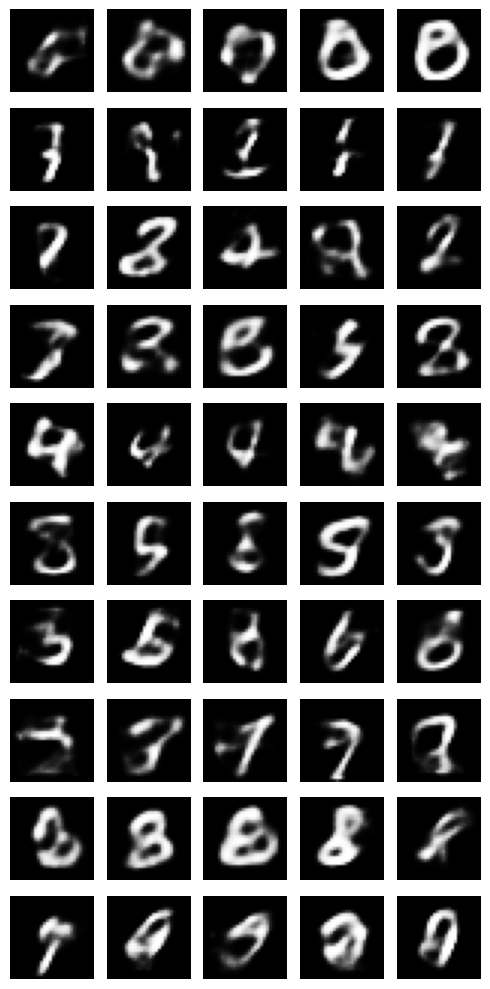

In [8]:

# Now call it
generate_digits(model, classifier, num_per_digit=5)

# Prompt 4

Ok that works now. Could u explain more about how the images are generated and how this isn't just sampling from mnist

# Response 4 markdown complete

Great to hear it works now! Let me break down **how your VAE generates new images** — and why it's **not just sampling from MNIST**, but actually *learning a generative model* of digits.

---

### **How Images Are Generated in Your VAE**

#### 1. **Training: Learn a Latent Space**
During training, the VAE learns to:
- **Encode** input MNIST images into a latent vector `z` (via `mu` and `logvar`)
- **Decode** `z` back into a reconstruction of the original image

The encoder tries to shape the distribution of latent codes to be close to a **standard normal distribution** (`N(0, I)`), via the KL divergence term in the loss.

---

#### 2. **Sampling: Generate New Images**
At generation time:
- You **sample random vectors** `z ~ N(0, I)` (not from MNIST!)
- Feed them to the **decoder** to get synthetic images
- These images are **new and never seen in the training data**

So this is **not just "resampling" or shuffling MNIST** — the VAE learns to generate new images by modeling the entire data distribution.

---

### **Why It’s Not Just Sampling from MNIST**

- You're generating latent vectors from a **random normal distribution**, not from the MNIST dataset.
- The decoder network has learned a **mapping from latent space to image space** — it can synthesize new images that look like digits because of what it learned during training.
- The generated digits are **not exact copies** of anything in the dataset — they are new, plausible digits synthesized from scratch.

---

### **Bonus: Visualizing the Latent Space**
If you reduce the `latent_size` to 2 or 3, you can visualize how the model arranges digits in the latent space. This shows how the VAE learns a **smooth, continuous manifold** where small changes in `z` produce small changes in the generated image.

Would you like a visual demo of that too?

# Prompt 5

Yes that would be great

# Response 5 complete markdown

Awesome! Here's how you can **visualize the 2D latent space** of a VAE trained on MNIST. This will show how digits are organized and how smoothly the VAE interpolates between them.

---

### ✅ Step 1: Modify Your VAE for a 2D Latent Space

Change the latent size from 20 to **2** for easy visualization:

```python
latent_size = 2  # instead of 20
```

Make sure you re-initialize and re-train the VAE with this new latent size. You can use fewer epochs just to get a quick view.

---

### ✅ Step 2: Visualize the Latent Space (Encoding Existing MNIST)

This plots where the model places real digits in latent space:

```python
import matplotlib.pyplot as plt

def plot_encoded_space(model, data_loader):
    model.eval()
    zs = []
    labels = []

    with torch.no_grad():
        for images, lbls in data_loader:
            images = images.to(device)
            mu, logvar = model.encode(images.view(-1, 784))
            z = mu  # use the mean of the latent distribution
            zs.append(z.cpu())
            labels.append(lbls)

    zs = torch.cat(zs)
    labels = torch.cat(labels)

    plt.figure(figsize=(8, 6))
    plt.scatter(zs[:, 0], zs[:, 1], c=labels, cmap='tab10', s=10)
    plt.colorbar()
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.title('Encoded latent space of MNIST')
    plt.show()
```

Then call it:

```python
plot_encoded_space(model, train_loader)
```

---

### ✅ Step 3: Generate a Grid of Digits from the Latent Space

This plots decoded images across a 2D grid of `z` values:

```python
import numpy as np

def plot_generated_grid(model, grid_size=20, scale=2.0):
    model.eval()
    with torch.no_grad():
        figure = np.zeros((28 * grid_size, 28 * grid_size))

        # Create a grid of latent space values
        grid_x = np.linspace(-scale, scale, grid_size)
        grid_y = np.linspace(-scale, scale, grid_size)

        for i, yi in enumerate(grid_y):
            for j, xi in enumerate(grid_x):
                z = torch.tensor([[xi, yi]], dtype=torch.float32).to(device)
                x_decoded = model.decode(z)
                digit = x_decoded.view(28, 28).cpu().numpy()
                figure[i * 28: (i + 1) * 28,
                       j * 28: (j + 1) * 28] = digit

        plt.figure(figsize=(8, 8))
        plt.imshow(figure, cmap='gray')
        plt.axis('off')
        plt.title("Generated digits across 2D latent space")
        plt.show()
```

Then run:

```python
plot_generated_grid(model)
```

---

This will give you:
- A **2D map of where real digits get encoded**
- A **grid of synthetic digits** showing how `z` changes image style

Let me know if you want help extending this to a conditional VAE so you can generate a digit just by choosing its label.

# Response 5 sbs

Awesome! Here's how you can **visualize the 2D latent space** of a VAE trained on MNIST. This will show how digits are organized and how smoothly the VAE interpolates between them.

---

### ✅ Step 1: Modify Your VAE for a 2D Latent Space

Change the latent size from 20 to **2** for easy visualization:



In [14]:
latent_size = 2  # instead of 20

Make sure you re-initialize and re-train the VAE with this new latent size. You can use fewer epochs just to get a quick view.

---

### ✅ Step 2: Visualize the Latent Space (Encoding Existing MNIST)

This plots where the model places real digits in latent space:

In [16]:
import matplotlib.pyplot as plt

def plot_encoded_space(model, data_loader):
    model.eval()
    zs = []
    labels = []

    with torch.no_grad():
        for images, lbls in data_loader:
            images = images.to(device)
            mu, logvar = model.encode(images.view(-1, 784))
            z = mu  # use the mean of the latent distribution
            zs.append(z.cpu())
            labels.append(lbls)

    zs = torch.cat(zs)
    labels = torch.cat(labels)

    plt.figure(figsize=(8, 6))
    plt.scatter(zs[:, 0], zs[:, 1], c=labels, cmap='tab10', s=10)
    plt.colorbar()
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.title('Encoded latent space of MNIST')
    plt.show()

Then call it:

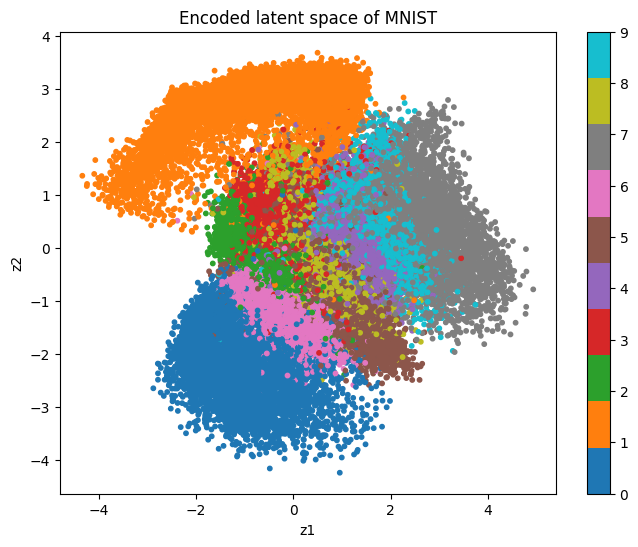

In [17]:
plot_encoded_space(model, train_loader)


---

### ✅ Step 3: Generate a Grid of Digits from the Latent Space

This plots decoded images across a 2D grid of `z` values:


In [18]:
import numpy as np

def plot_generated_grid(model, grid_size=20, scale=2.0):
    model.eval()
    with torch.no_grad():
        figure = np.zeros((28 * grid_size, 28 * grid_size))

        # Create a grid of latent space values
        grid_x = np.linspace(-scale, scale, grid_size)
        grid_y = np.linspace(-scale, scale, grid_size)

        for i, yi in enumerate(grid_y):
            for j, xi in enumerate(grid_x):
                z = torch.tensor([[xi, yi]], dtype=torch.float32).to(device)
                x_decoded = model.decode(z)
                digit = x_decoded.view(28, 28).cpu().numpy()
                figure[i * 28: (i + 1) * 28,
                       j * 28: (j + 1) * 28] = digit

        plt.figure(figsize=(8, 8))
        plt.imshow(figure, cmap='gray')
        plt.axis('off')
        plt.title("Generated digits across 2D latent space")
        plt.show()

Then run:

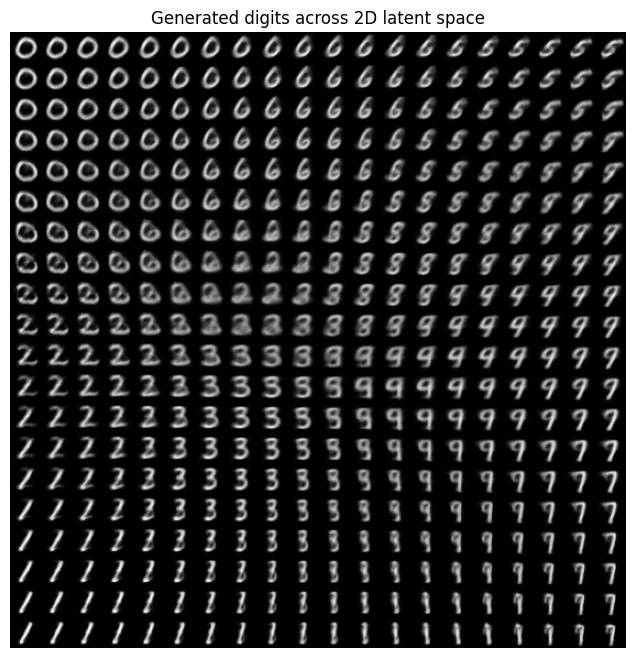

In [19]:
plot_generated_grid(model)


---

This will give you:
- A **2D map of where real digits get encoded**
- A **grid of synthetic digits** showing how `z` changes image style

Let me know if you want help extending this to a conditional VAE so you can generate a digit just by choosing its label.

# Promt 6

In the final cell I got this error can u fix the code?
RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2 and 20x256)

# Gemini Model

# Initial Prompt Code

In [20]:
latent_size = 20  # Dimension of latent space

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784  # 28x28 MNIST images
hidden_size = 256
# latent_size = 20  # Dimension of latent space
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data',
                                   train=True,
                                   transform=transforms.ToTensor(),
                                   download=True)

train_loader = DataLoader(dataset=train_dataset,
                                     batch_size=batch_size,
                                     shuffle=True)

# VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc21 = nn.Linear(hidden_size, latent_size)
        self.fc22 = nn.Linear(hidden_size, latent_size)
        self.fc3 = nn.Linear(latent_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, input_size)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Model instance, optimizer, and loss function
model = VAE(input_size, hidden_size, latent_size).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Reconstruction + KL divergence losses
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        images = images.to(device)

        # Forward pass
        recon_x, mu, logvar = model(images)
        loss = loss_function(recon_x, images, mu, logvar)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

Epoch [1/10], Step [100/600], Loss: 19219.6699
Epoch [1/10], Step [200/600], Loss: 16939.7422
Epoch [1/10], Step [300/600], Loss: 15722.9033
Epoch [1/10], Step [400/600], Loss: 14264.7383
Epoch [1/10], Step [500/600], Loss: 13324.7090
Epoch [1/10], Step [600/600], Loss: 12805.4805
Epoch [2/10], Step [100/600], Loss: 12622.2686
Epoch [2/10], Step [200/600], Loss: 12322.7188
Epoch [2/10], Step [300/600], Loss: 12264.9473
Epoch [2/10], Step [400/600], Loss: 11949.0137
Epoch [2/10], Step [500/600], Loss: 11686.4453
Epoch [2/10], Step [600/600], Loss: 11583.2637
Epoch [3/10], Step [100/600], Loss: 11411.8457
Epoch [3/10], Step [200/600], Loss: 12118.6816
Epoch [3/10], Step [300/600], Loss: 11324.0449
Epoch [3/10], Step [400/600], Loss: 11541.2676
Epoch [3/10], Step [500/600], Loss: 11207.8574
Epoch [3/10], Step [600/600], Loss: 11485.2891
Epoch [4/10], Step [100/600], Loss: 11780.9043
Epoch [4/10], Step [200/600], Loss: 11411.8555
Epoch [4/10], Step [300/600], Loss: 10933.9473
Epoch [4/10],

# Response 1 complete markdown

Okay, here's how you can generate new images using your trained VAE model.

The core idea is to:
1.  Sample random vectors `z` from the latent space distribution (which the VAE tries to make close to a standard normal distribution, N(0, I)).
2.  Pass these sampled latent vectors `z` through the VAE's *decoder* part.
3.  Reshape the output of the decoder back into image format.

Add the following code block *after* your training loop:

```python
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# --- (Keep your existing code for imports, model definition, training loop) ---

# Make sure the model is in evaluation mode
model.eval()

# Number of images to generate
num_generate = 10  # Let's generate 10 sample images

# Generate images
with torch.no_grad(): # We don't need gradients for generation
    # 1. Sample random vectors from the latent space (standard normal distribution)
    #    The shape should be (number_of_images, latent_size)
    z = torch.randn(num_generate, latent_size).to(device)

    # 2. Decode the sampled latent vectors
    #    The decode function takes latent vectors z and outputs reconstructed images
    generated_images = model.decode(z)

    # 3. Reshape the output into image format (e.g., 28x28 for MNIST)
    #    The output of the decoder is likely flat (batch_size, 784),
    #    so reshape it to (batch_size, 1, 28, 28) for visualization
    generated_images = generated_images.view(num_generate, 1, 28, 28)

    # Move images to CPU for plotting
    generated_images_cpu = generated_images.cpu()

# Visualize the generated images
print("\nGenerated Images:")
plt.figure(figsize=(10, 2)) # Adjust figure size as needed
# Use torchvision's make_grid to arrange the images
grid = vutils.make_grid(generated_images_cpu, nrow=num_generate, padding=2, normalize=True)
plt.imshow(grid.permute(1, 2, 0)) # Adjust dimensions for matplotlib (channels last)
plt.axis('off')
plt.show()

# --- Optional: If you want to save the grid image ---
# vutils.save_image(generated_images_cpu, 'generated_vae_images.png', nrow=num_generate, normalize=True)
# print("Generated images saved to generated_vae_images.png")
```

**Explanation:**

1.  **`model.eval()`**: This sets the model to evaluation mode. It's important because it disables layers like Dropout and affects Batch Normalization layers, ensuring consistent output during inference/generation.
2.  **`with torch.no_grad()`**: This context manager tells PyTorch not to compute or store gradients, which saves memory and computation since we are not training.
3.  **`torch.randn(num_generate, latent_size).to(device)`**: This creates a tensor of shape (`num_generate`, `latent_size`) filled with random numbers sampled from a standard normal distribution (mean 0, variance 1). This tensor represents points sampled from the learned latent space. It's moved to the same `device` (CPU or GPU) as the model.
4.  **`model.decode(z)`**: We directly call the `decode` method of your VAE model, passing the sampled latent vectors `z`. The decoder transforms these abstract latent representations back into the pixel space.
5.  **`.view(num_generate, 1, 28, 28)`**: The decoder's output (`self.fc4`) is likely a flat vector of size `input_size` (784). We reshape it into the original image format (`batch_size`, `channels`, `height`, `width`). For MNIST, this is (`num_generate`, 1, 28, 28).
6.  **`.cpu()`**: Matplotlib typically works with NumPy arrays on the CPU, so we move the generated images tensor from the GPU (if used) back to the CPU.
7.  **Visualization (`matplotlib` and `torchvision.utils`)**:
    * `vutils.make_grid` is a handy function from `torchvision` that takes a batch of images and arranges them into a grid.
    * `grid.permute(1, 2, 0)` changes the tensor dimension order from (Channels, Height, Width) which PyTorch uses, to (Height, Width, Channels) which Matplotlib expects for `imshow`.
    * `plt.imshow(...)` displays the image grid.
    * `plt.axis('off')` hides the axes.
    * `plt.show()` shows the plot.

**Important Note:**

A standard VAE generates images resembling the training data by sampling from the learned latent space. It doesn't inherently allow you to say "generate a 5" or "generate a 9". You sample random points, and the decoder produces images that look like *some* digit from the training set. The quality and variety of the generated digits will depend heavily on how well the VAE was trained (number of epochs, hyperparameters, etc.). You will likely get a mix of digits resembling 0 through 9, but you cannot directly control *which* specific digit is generated with this basic VAE structure.

# Response 1 sbs

Okay, here's how you can generate new images using your trained VAE model.

The core idea is to:
1.  Sample random vectors `z` from the latent space distribution (which the VAE tries to make close to a standard normal distribution, N(0, I)).
2.  Pass these sampled latent vectors `z` through the VAE's *decoder* part.
3.  Reshape the output of the decoder back into image format.

Add the following code block *after* your training loop:




Generated Images:


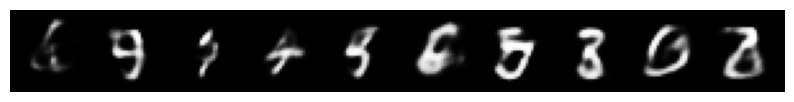

In [22]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# --- (Keep your existing code for imports, model definition, training loop) ---

# Make sure the model is in evaluation mode
model.eval()

# Number of images to generate
num_generate = 10  # Let's generate 10 sample images

# Generate images
with torch.no_grad(): # We don't need gradients for generation
    # 1. Sample random vectors from the latent space (standard normal distribution)
    #    The shape should be (number_of_images, latent_size)
    z = torch.randn(num_generate, latent_size).to(device)

    # 2. Decode the sampled latent vectors
    #    The decode function takes latent vectors z and outputs reconstructed images
    generated_images = model.decode(z)

    # 3. Reshape the output into image format (e.g., 28x28 for MNIST)
    #    The output of the decoder is likely flat (batch_size, 784),
    #    so reshape it to (batch_size, 1, 28, 28) for visualization
    generated_images = generated_images.view(num_generate, 1, 28, 28)

    # Move images to CPU for plotting
    generated_images_cpu = generated_images.cpu()

# Visualize the generated images
print("\nGenerated Images:")
plt.figure(figsize=(10, 2)) # Adjust figure size as needed
# Use torchvision's make_grid to arrange the images
grid = vutils.make_grid(generated_images_cpu, nrow=num_generate, padding=2, normalize=True)
plt.imshow(grid.permute(1, 2, 0)) # Adjust dimensions for matplotlib (channels last)
plt.axis('off')
plt.show()

# --- Optional: If you want to save the grid image ---
# vutils.save_image(generated_images_cpu, 'generated_vae_images.png', nrow=num_generate, normalize=True)
# print("Generated images saved to generated_vae_images.png")

**Explanation:**

1.  **`model.eval()`**: This sets the model to evaluation mode. It's important because it disables layers like Dropout and affects Batch Normalization layers, ensuring consistent output during inference/generation.
2.  **`with torch.no_grad()`**: This context manager tells PyTorch not to compute or store gradients, which saves memory and computation since we are not training.
3.  **`torch.randn(num_generate, latent_size).to(device)`**: This creates a tensor of shape (`num_generate`, `latent_size`) filled with random numbers sampled from a standard normal distribution (mean 0, variance 1). This tensor represents points sampled from the learned latent space. It's moved to the same `device` (CPU or GPU) as the model.
4.  **`model.decode(z)`**: We directly call the `decode` method of your VAE model, passing the sampled latent vectors `z`. The decoder transforms these abstract latent representations back into the pixel space.
5.  **`.view(num_generate, 1, 28, 28)`**: The decoder's output (`self.fc4`) is likely a flat vector of size `input_size` (784). We reshape it into the original image format (`batch_size`, `channels`, `height`, `width`). For MNIST, this is (`num_generate`, 1, 28, 28).
6.  **`.cpu()`**: Matplotlib typically works with NumPy arrays on the CPU, so we move the generated images tensor from the GPU (if used) back to the CPU.
7.  **Visualization (`matplotlib` and `torchvision.utils`)**:
    * `vutils.make_grid` is a handy function from `torchvision` that takes a batch of images and arranges them into a grid.
    * `grid.permute(1, 2, 0)` changes the tensor dimension order from (Channels, Height, Width) which PyTorch uses, to (Height, Width, Channels) which Matplotlib expects for `imshow`.
    * `plt.imshow(...)` displays the image grid.
    * `plt.axis('off')` hides the axes.
    * `plt.show()` shows the plot.

**Important Note:**

A standard VAE generates images resembling the training data by sampling from the learned latent space. It doesn't inherently allow you to say "generate a 5" or "generate a 9". You sample random points, and the decoder produces images that look like *some* digit from the training set. The quality and variety of the generated digits will depend heavily on how well the VAE was trained (number of epochs, hyperparameters, etc.). You will likely get a mix of digits resembling 0 through 9, but you cannot directly control *which* specific digit is generated with this basic VAE structure.

# Prompt 2
Could u explain more about how the images are generated and how this isn't just sampling from mnist


# Response 2 complete markdown

Okay, let's break down the difference between generating images with your VAE and simply sampling from the MNIST dataset.

**1. Sampling from MNIST Dataset**

* **What it is:** This is like having a big photo album (the MNIST dataset) containing 60,000 specific, pre-existing images of handwritten digits (0-9).
* **Process:** When you "sample" from MNIST, you are essentially:
    1.  Choosing a random page number (index) in the album.
    2.  Taking out the exact photo on that page.
* **Result:** You get a **copy** of an image that already exists in the dataset. It's one specific instance of how someone actually drew a digit. There's no "generation" happening; it's just **retrieval**.

**2. Generating Images with the VAE**

* **What it is:** The VAE doesn't store the original images like an album. Instead, during training, it learns two things:
    * **Encoder:** How to compress the *essential features* of an input digit image into a much smaller, abstract representation in a "latent space" (your `latent_size=20` dimensions). It learns a *probability distribution* (defined by `mu` and `logvar`) in this space for each input image. Think of this latent space as a kind of "map" where similar-looking digits are located near each other.
    * **Decoder:** How to take a point (a coordinate vector `z`) from this abstract latent space map and reconstruct it back into a full 28x28 pixel image that *looks like* a digit. It learns the general rules and structure of what makes a digit look like a digit.
    * **Training Goal:** The VAE is trained so that the distributions the encoder produces are clustered around a simple, known distribution (typically a standard normal distribution, N(0, I) - mean 0, variance 1) while still allowing the decoder to reconstruct the images accurately.

* **Process (Generation Phase):**
    1.  **Forget the Encoder:** We don't use an existing MNIST image as input.
    2.  **Sample New Coordinates:** We generate *new*, random coordinate vectors `z` by sampling directly from that target standard normal distribution (`torch.randn(num_generate, latent_size)`). These `z` vectors are points in the abstract latent map that *don't* necessarily correspond exactly to any single image the VAE saw during training. They represent novel locations on the map.
    3.  **Use the Decoder:** We feed these *new* latent vectors `z` into the **trained decoder**.
    4.  **Synthesize Image:** The decoder, having learned the "rules" of digit structure, takes the abstract coordinates `z` and **synthesizes** a *new* 28x28 pixel image that it believes corresponds to that location in the latent space.

* **Result:** You get a **brand new, synthesized image**. It should *resemble* the digits the VAE was trained on (because the decoder learned their structure), but it's *not* a direct copy of any specific image from the MNIST training set. It's the VAE's interpretation or creation based on the random latent vector `z` you provided. Think of it as the VAE "imagining" a new digit based on its learned understanding.

**In Analogy:**

* **MNIST Sampling:** Picking a specific, existing photograph of a cat from a large photo collection.
* **VAE Generation:** Learning the "essence" of what makes a cat look like a cat (pointy ears, whiskers, fur patterns, etc. - represented abstractly in the latent space). Then, creating a *new drawing* or rendering of a cat based on that learned essence, possibly combining features in novel ways. The result looks like a cat, but it's not a copy of any specific photo you learned from.

**Key Difference:** MNIST sampling retrieves **existing data**, while VAE generation **synthesizes novel data** based on learned patterns and a probabilistic latent space. The VAE generates images that follow the statistical distribution of the training data but are unique instances created by the decoder from random latent codes.

# Prompt 3

Could you help by visualizing the 2d latent space

# Prompt 3 complete markdown

Okay, visualizing the latent space is a great way to understand how the VAE is organizing the data internally. Since your `latent_size` is 20, we can't directly plot it (we can only easily visualize 2 or 3 dimensions).

The standard approach is to:
1.  Use the **encoder** part of your trained VAE to get the latent representations (specifically the mean vector `mu`) for a set of input images (e.g., from the MNIST test set).
2.  Use a **dimensionality reduction technique** (like t-SNE or PCA) to project these 20-dimensional `mu` vectors down to 2 dimensions.
3.  Create a **scatter plot** of these 2D points, coloring each point according to its actual digit label (0-9).

This will show you how the VAE clusters different digits in its learned latent space (as viewed through the 2D projection).

Here's the code to do that. You'll need `scikit-learn` and `matplotlib`. If you don't have scikit-learn, install it: `pip install scikit-learn matplotlib`

Add this code block *after* your training loop and the generation code:

```python
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA # Alternative dimensionality reduction
import time # To time the potentially slow t-SNE

print("\nVisualizing Latent Space...")

# --- Ensure you have the model and device defined from previous code ---
# model = VAE(...)
# device = torch.device(...)
# model.load_state_dict(...) # Load trained weights if needed

# --- Load MNIST test dataset (we need labels this time) ---
test_dataset = datasets.MNIST(root='./data',
                                  train=False,
                                  transform=transforms.ToTensor(),
                                  download=True)

# Use a DataLoader - can adjust batch_size based on memory
# Process a subset for faster visualization if needed (e.g., first 5000 samples)
# test_subset = torch.utils.data.Subset(test_dataset, range(5000))
# test_loader = DataLoader(dataset=test_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


# --- Encode images to get latent representations (mu) ---
model.eval()  # Set model to evaluation mode
all_mu = []
all_labels = []

with torch.no_grad(): # No gradients needed
    for images, labels in test_loader:
        images = images.to(device)
        # Get mu and logvar from the encoder
        mu, logvar = model.encode(images.view(-1, 784))
        # Store mu and labels
        all_mu.append(mu.cpu().numpy()) # Move mu to CPU and convert to numpy
        all_labels.append(labels.cpu().numpy())

# Concatenate results from all batches
all_mu = np.concatenate(all_mu, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

print(f"Encoded {all_mu.shape[0]} images into {all_mu.shape[1]}-dimensional latent space.")

# --- Perform dimensionality reduction (t-SNE) ---
print("Performing t-SNE reduction (this might take a while)...")
start_time = time.time()

# You can adjust t-SNE parameters:
# perplexity: related to the number of nearest neighbors (typical range 5-50)
# n_iter: number of optimization iterations
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, n_jobs=-1) # Use n_jobs=-1 for parallel processing
latent_2d = tsne.fit_transform(all_mu)

# --- Alternative: PCA ---
# print("Performing PCA reduction...")
# pca = PCA(n_components=2, random_state=42)
# latent_2d = pca.fit_transform(all_mu)

end_time = time.time()
print(f"t-SNE finished in {end_time - start_time:.2f} seconds.")


# --- Create the scatter plot ---
plt.figure(figsize=(12, 10))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=all_labels, cmap='viridis', s=5) # s=size of points

# Create a legend
# Method 1: Add legend handles manually
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=str(i),
                           markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=8)
                  for i in range(10)] # Digits 0-9
plt.legend(handles=legend_handles, title="Digits")

# Method 2: Using plt.colorbar (simpler if exact colors aren't needed in legend)
# plt.colorbar(scatter, label='Digits', ticks=range(10))


plt.title('2D t-SNE projection of the VAE Latent Space (MNIST Test Set)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
```

**Explanation:**

1.  **Load Test Data:** We load the MNIST *test* dataset because we want to see how the VAE organizes data it wasn't explicitly trained on (though it saw similar data during training). Crucially, we also get the `labels`.
2.  **Encode Data:** We iterate through the test data using a `DataLoader`, pass the images through the `model.encode()` function (in `eval` mode and without gradients), and store the resulting mean vectors (`mu`) and their corresponding `labels`. We collect these in lists and then concatenate them into NumPy arrays.
3.  **Dimensionality Reduction (t-SNE):**
    * `TSNE(n_components=2, ...)`: We initialize t-SNE to reduce the data to 2 dimensions.
        * `perplexity`: A key parameter affecting the balance between local and global aspects of the data. 30 is a common starting point.
        * `n_iter`: Number of optimization steps. More iterations can lead to better results but take longer.
        * `random_state`: Ensures reproducibility.
        * `n_jobs=-1`: Uses all available CPU cores to speed up computation.
    * `tsne.fit_transform(all_mu)`: This performs the t-SNE calculation, taking the high-dimensional `all_mu` data and returning the 2-dimensional representation `latent_2d`.
    * **PCA (Alternative):** PCA is faster but often less effective at revealing fine-grained cluster structures compared to t-SNE. You can uncomment the PCA lines and comment out the t-SNE lines to try it.
4.  **Plotting:**
    * `plt.scatter(...)`: Creates the scatter plot where the x and y coordinates are the two dimensions from `latent_2d`.
    * `c=all_labels`: This is the key part – it colors each point based on its true digit label.
    * `cmap='viridis'`: Sets the color scheme. You can choose others like 'tab10' or 'jet'.
    * `s=5`: Sets the size of the points.
    * **Legend:** The code creates a legend to clearly show which color corresponds to which digit (0-9).
    * Labels and Title: Standard plot annotations are added.

When you run this, you should see a 2D plot where points representing the same digit tend to cluster together, indicating that the VAE has learned meaningful representations in its latent space. The degree of separation or overlap between clusters gives you insight into how well the model distinguishes between different digits internally.

Okay, visualizing the latent space is a great way to understand how the VAE is organizing the data internally. Since your `latent_size` is 20, we can't directly plot it (we can only easily visualize 2 or 3 dimensions).

The standard approach is to:
1.  Use the **encoder** part of your trained VAE to get the latent representations (specifically the mean vector `mu`) for a set of input images (e.g., from the MNIST test set).
2.  Use a **dimensionality reduction technique** (like t-SNE or PCA) to project these 20-dimensional `mu` vectors down to 2 dimensions.
3.  Create a **scatter plot** of these 2D points, coloring each point according to its actual digit label (0-9).

This will show you how the VAE clusters different digits in its learned latent space (as viewed through the 2D projection).

Here's the code to do that. You'll need `scikit-learn` and `matplotlib`. If you don't have scikit-learn, install it: `pip install scikit-learn matplotlib`

Add this code block *after* your training loop and the generation code:

```python

```




Visualizing Latent Space...
Epoch [1/10], Step [100/600], Loss: 19954.2480
Epoch [1/10], Step [200/600], Loss: 15953.3223
Epoch [1/10], Step [300/600], Loss: 14708.4258
Epoch [1/10], Step [400/600], Loss: 14886.4209
Epoch [1/10], Step [500/600], Loss: 13746.2988
Epoch [1/10], Step [600/600], Loss: 13589.9844
Epoch [2/10], Step [100/600], Loss: 12651.4287
Epoch [2/10], Step [200/600], Loss: 12043.1670
Epoch [2/10], Step [300/600], Loss: 12078.0020
Epoch [2/10], Step [400/600], Loss: 11736.4766
Epoch [2/10], Step [500/600], Loss: 12298.3691
Epoch [2/10], Step [600/600], Loss: 11523.1338
Epoch [3/10], Step [100/600], Loss: 11690.6953
Epoch [3/10], Step [200/600], Loss: 11860.0781
Epoch [3/10], Step [300/600], Loss: 10833.3037
Epoch [3/10], Step [400/600], Loss: 11749.1699
Epoch [3/10], Step [500/600], Loss: 11461.4395
Epoch [3/10], Step [600/600], Loss: 11752.4443
Epoch [4/10], Step [100/600], Loss: 11633.4951
Epoch [4/10], Step [200/600], Loss: 11533.2637
Epoch [4/10], Step [300/600], L

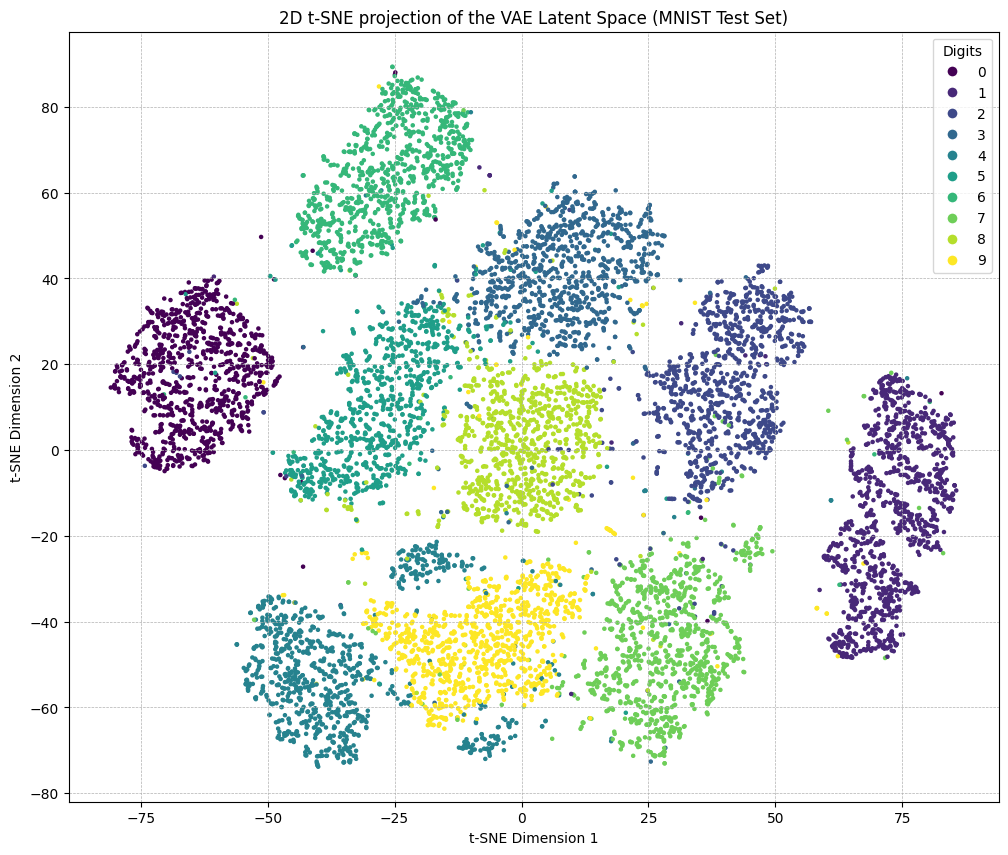

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA # Alternative dimensionality reduction
import time # To time the potentially slow t-SNE

print("\nVisualizing Latent Space...")

# --- Ensure you have the model and device defined from previous code ---
# model = VAE(...)
# device = torch.device(...)
# model.load_state_dict(...) # Load trained weights if needed

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784  # 28x28 MNIST images
hidden_size = 256
# latent_size = 20  # Dimension of latent space
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc21 = nn.Linear(hidden_size, latent_size)
        self.fc22 = nn.Linear(hidden_size, latent_size)
        self.fc3 = nn.Linear(latent_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, input_size)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Model instance, optimizer, and loss function
model = VAE(input_size, hidden_size, latent_size).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Reconstruction + KL divergence losses
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        images = images.to(device)

        # Forward pass
        recon_x, mu, logvar = model(images)
        loss = loss_function(recon_x, images, mu, logvar)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))


# RESPONSE CODE STARTS HERE


# --- Load MNIST test dataset (we need labels this time) ---
test_dataset = datasets.MNIST(root='./data',
                                  train=False,
                                  transform=transforms.ToTensor(),
                                  download=True)

# Use a DataLoader - can adjust batch_size based on memory
# Process a subset for faster visualization if needed (e.g., first 5000 samples)
# test_subset = torch.utils.data.Subset(test_dataset, range(5000))
# test_loader = DataLoader(dataset=test_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


# --- Encode images to get latent representations (mu) ---
model.eval()  # Set model to evaluation mode
all_mu = []
all_labels = []

with torch.no_grad(): # No gradients needed
    for images, labels in test_loader:
        images = images.to(device)
        # Get mu and logvar from the encoder
        mu, logvar = model.encode(images.view(-1, 784))
        # Store mu and labels
        all_mu.append(mu.cpu().numpy()) # Move mu to CPU and convert to numpy
        all_labels.append(labels.cpu().numpy())

# Concatenate results from all batches
all_mu = np.concatenate(all_mu, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

print(f"Encoded {all_mu.shape[0]} images into {all_mu.shape[1]}-dimensional latent space.")

# --- Perform dimensionality reduction (t-SNE) ---
print("Performing t-SNE reduction (this might take a while)...")
start_time = time.time()

# You can adjust t-SNE parameters:
# perplexity: related to the number of nearest neighbors (typical range 5-50)
# n_iter: number of optimization iterations
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, n_jobs=-1) # Use n_jobs=-1 for parallel processing
latent_2d = tsne.fit_transform(all_mu)

# --- Alternative: PCA ---
# print("Performing PCA reduction...")
# pca = PCA(n_components=2, random_state=42)
# latent_2d = pca.fit_transform(all_mu)

end_time = time.time()
print(f"t-SNE finished in {end_time - start_time:.2f} seconds.")


# --- Create the scatter plot ---
plt.figure(figsize=(12, 10))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=all_labels, cmap='viridis', s=5) # s=size of points

# Create a legend
# Method 1: Add legend handles manually
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=str(i),
                           markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=8)
                  for i in range(10)] # Digits 0-9
plt.legend(handles=legend_handles, title="Digits")

# Method 2: Using plt.colorbar (simpler if exact colors aren't needed in legend)
# plt.colorbar(scatter, label='Digits', ticks=range(10))


plt.title('2D t-SNE projection of the VAE Latent Space (MNIST Test Set)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

**Explanation:**

1.  **Load Test Data:** We load the MNIST *test* dataset because we want to see how the VAE organizes data it wasn't explicitly trained on (though it saw similar data during training). Crucially, we also get the `labels`.
2.  **Encode Data:** We iterate through the test data using a `DataLoader`, pass the images through the `model.encode()` function (in `eval` mode and without gradients), and store the resulting mean vectors (`mu`) and their corresponding `labels`. We collect these in lists and then concatenate them into NumPy arrays.
3.  **Dimensionality Reduction (t-SNE):**
    * `TSNE(n_components=2, ...)`: We initialize t-SNE to reduce the data to 2 dimensions.
        * `perplexity`: A key parameter affecting the balance between local and global aspects of the data. 30 is a common starting point.
        * `n_iter`: Number of optimization steps. More iterations can lead to better results but take longer.
        * `random_state`: Ensures reproducibility.
        * `n_jobs=-1`: Uses all available CPU cores to speed up computation.
    * `tsne.fit_transform(all_mu)`: This performs the t-SNE calculation, taking the high-dimensional `all_mu` data and returning the 2-dimensional representation `latent_2d`.
    * **PCA (Alternative):** PCA is faster but often less effective at revealing fine-grained cluster structures compared to t-SNE. You can uncomment the PCA lines and comment out the t-SNE lines to try it.
4.  **Plotting:**
    * `plt.scatter(...)`: Creates the scatter plot where the x and y coordinates are the two dimensions from `latent_2d`.
    * `c=all_labels`: This is the key part – it colors each point based on its true digit label.
    * `cmap='viridis'`: Sets the color scheme. You can choose others like 'tab10' or 'jet'.
    * `s=5`: Sets the size of the points.
    * **Legend:** The code creates a legend to clearly show which color corresponds to which digit (0-9).
    * Labels and Title: Standard plot annotations are added.

When you run this, you should see a 2D plot where points representing the same digit tend to cluster together, indicating that the VAE has learned meaningful representations in its latent space. The degree of separation or overlap between clusters gives you insight into how well the model distinguishes between different digits internally.